In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [4]:
data = np.genfromtxt("ASTR19_F24_group_project_data.txt",
                     dtype=[('day', 'i8'),('time','U6'),('height','f8')])

day = []
time = []
height = []

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
timeint = []
hour = []
minute = []

for i in range(82):
    timeint.append(time[i].split(":"))
    hour.append(int(timeint[i][0]))
    minute.append(int(timeint[i][1]))
    
for i in range (82):
    day[i] = day[i] + (hour[i] + (minute[i]/60))/24


In [5]:
def f_line(x, a, b, c, d):
    return a * np.sin(b*x + c) + d

params, params_cov = optimize.curve_fit(f_line, day, height, sigma = [0.25] * len(data), p0 = [4.2, 0.3, -2, 2.3])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

y_fit = f_line(np.array(day), a_fit, b_fit, c_fit, d_fit)


The standard deviation of the residuals is 2.2703670474261997


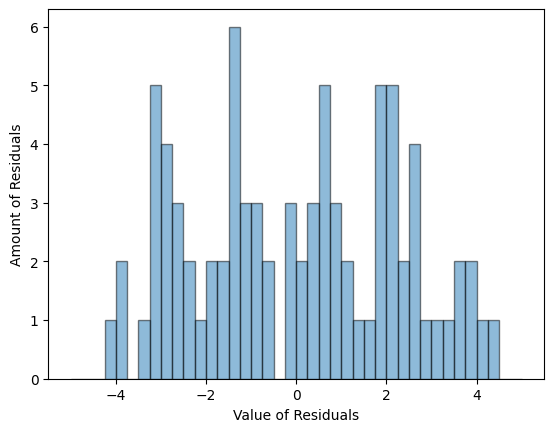

In [6]:
#difference between fitted line and data
residuals = height - y_fit

#82 entries of data for 42 days
n = 82

x = residuals

width = 0.25
histmin = np.floor(min(x))
histmax = np.ceil(max(x))+width

bins = np.arange(histmin,histmax,width)
plt.hist(x,bins=bins,alpha=0.5,edgecolor='black')
plt.xlabel("Value of Residuals")
plt.ylabel("Amount of Residuals")
plt.savefig("redsiduals_histogram",bbox_inches="tight",facecolor="white")

#find the standard deviation
def std():
    return np.std(x)

print(f"The standard deviation of the residuals is {std()}")